In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


# Load Data

In [73]:
data = pd.read_csv("data_A.csv")

In [74]:
data

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,7317,15637411,Tochukwu,749.0,France,Male,30.0,1,0.00,2,0,0,126551.65,1
1,1,11125,15745307,Martin,683.0,Germany,Male,32.0,7,121887.91,1,1,1,176570.46,0
2,2,45720,15677382,Aitken,711.0,Spain,Female,33.0,5,0.00,2,1,0,162703.80,0
3,3,74042,15694450,Tuan,722.0,France,Female,28.0,4,0.00,2,1,1,76615.31,0
4,4,109985,15734987,Aitken,754.0,France,Female,67.0,3,0.00,2,1,1,114514.92,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41253,41253,52916,15756850,Hsieh,683.0,Germany,Female,29.0,9,125552.82,1,1,0,173948.30,1
41254,41254,22343,15714355,Hsing,610.0,Germany,Female,39.0,6,111760.40,2,1,0,120135.62,0
41255,41255,80083,15578098,Jamieson,600.0,France,Male,31.0,3,0.00,2,1,1,121555.51,0
41256,41256,79853,15682467,Ts'ui,648.0,Spain,Female,46.0,1,0.00,1,1,1,170528.63,0


In [173]:
data["NumOfProducts"].max()

4

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41238 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  float64
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [76]:
data["Gender"].value_counts()

Male      23341
Female    17917
Name: Gender, dtype: int64

In [77]:
data.isna().sum()

Unnamed: 0          0
id                  0
CustomerId          0
Surname             0
CreditScore        20
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
churn               0
dtype: int64

# Remove Missing Values / Irrelevant columns

In [78]:
data.dropna(inplace=True)
data = data.drop(columns=["Unnamed: 0", "id", "CustomerId"])

# Data Exploration

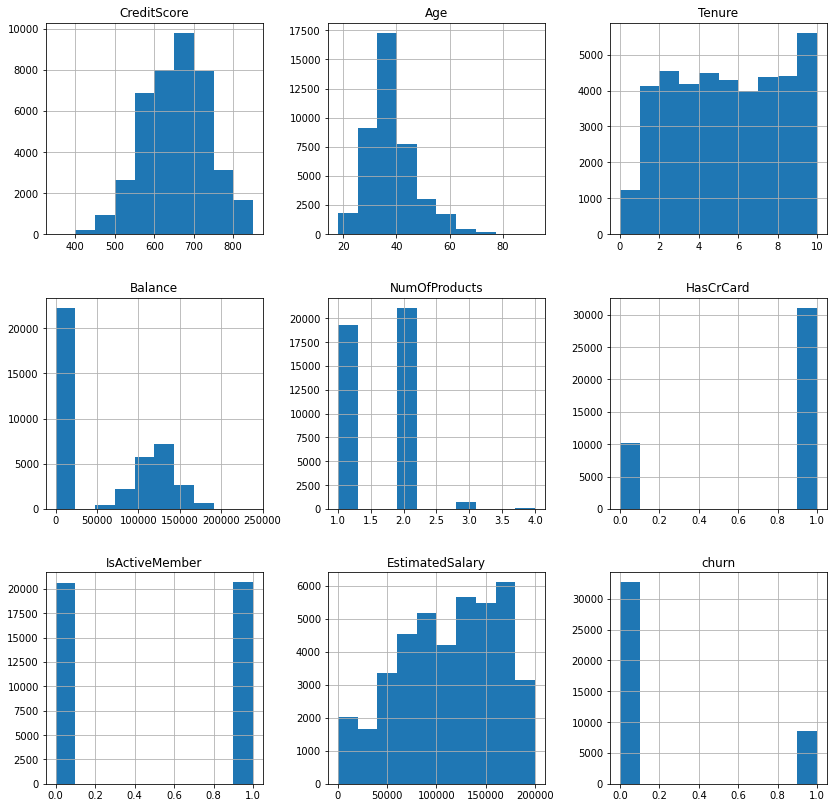

In [79]:
_ = data.hist(figsize= (14, 14))

In [80]:
data.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'churn'],
      dtype='object')

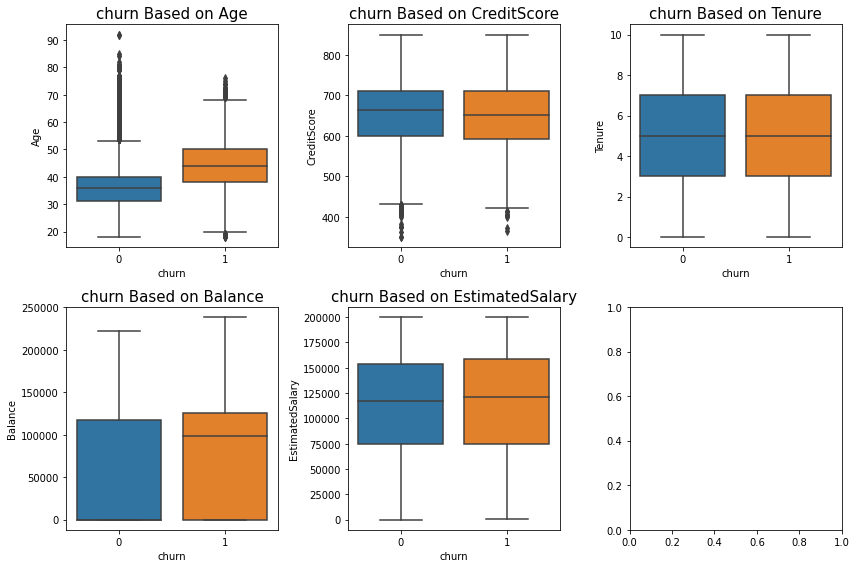

In [81]:
fig, ax = plt.subplots(nrows = 2, ncols=3, figsize = (12,8))

sns.boxplot(y = "Age", x = "churn", data = data, ax = ax[0,0])
ax[0,0].set_title("churn Based on Age", fontsize = 15)
sns.boxplot(y = "CreditScore", x = "churn", data = data, ax = ax[0,1])
ax[0,1].set_title("churn Based on CreditScore", fontsize = 15)
sns.boxplot(y = "Tenure", x = "churn", data = data, ax = ax[0,2])
ax[0,2].set_title("churn Based on Tenure", fontsize = 15)
sns.boxplot(y = "Balance", x = "churn", data = data, ax = ax[1,0])
ax[1,0].set_title("churn Based on Balance", fontsize = 15)
sns.boxplot(y = "EstimatedSalary", x = "churn", data = data, ax = ax[1,1])
ax[1,1].set_title("churn Based on EstimatedSalary", fontsize = 15)
plt.tight_layout()

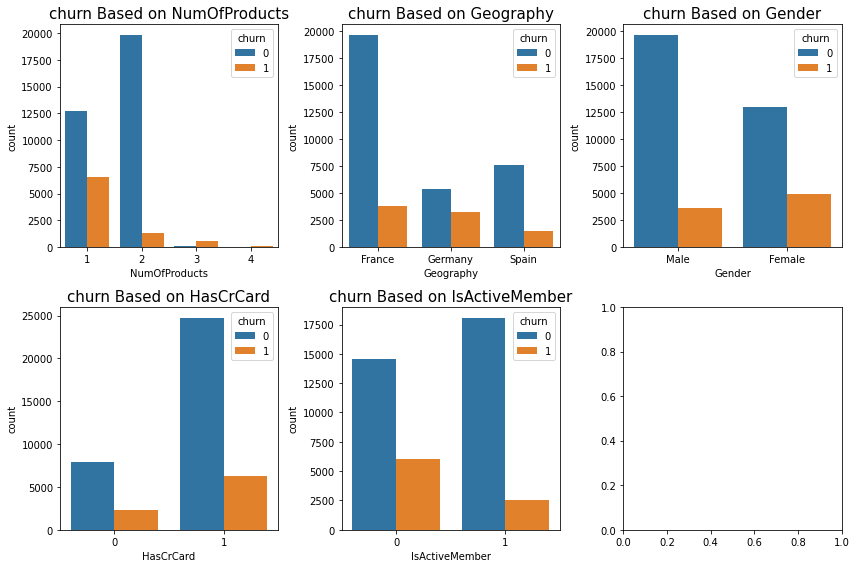

In [82]:
fig, ax = plt.subplots(nrows = 2, ncols=3, figsize = (12,8))

sns.countplot(x = "NumOfProducts", hue = "churn", data = data, ax = ax[0,0])
ax[0,0].set_title("churn Based on NumOfProducts", fontsize = 15)
sns.countplot(x = "Geography", hue = "churn", data = data, ax = ax[0,1])
ax[0,1].set_title("churn Based on Geography", fontsize = 15)
sns.countplot(x = "Gender", hue = "churn", data = data, ax = ax[0,2])
ax[0,2].set_title("churn Based on Gender", fontsize = 15)
sns.countplot(x = "HasCrCard", hue = "churn", data = data, ax = ax[1,0])
ax[1,0].set_title("churn Based on HasCrCard", fontsize = 15)
sns.countplot(x = "IsActiveMember", hue = "churn", data = data, ax = ax[1,1])
ax[1,1].set_title("churn Based on IsActiveMember", fontsize = 15)
plt.tight_layout()

# Split Data

In [177]:
X =data.drop(columns=["churn"],axis=1)
y =data['churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [178]:
x_train.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'],
      dtype='object')

# Log Transform

In [179]:
def log_transform(columns):
    for i in columns:
        x_train[i] = np.log(x_train[i] + 1e-8)
        x_test[i] = np.log(x_test[i] + 1e-8)

log_transform(["Age", "Balance"])

# Remove Outliers

In [180]:
def remove_outliers(xtrain, ytrain, columns):
    data = pd.concat([xtrain, ytrain], axis = 1)
    for i in columns:
        Q1 = np.quantile(data[i], 0.25)
        Q3 = np.quantile(data[i], 0.75)

        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]
        

    temp_x = data.drop(columns = pd.DataFrame(ytrain).columns[0])
    temp_y = data[pd.DataFrame(ytrain).columns[0]]
    return temp_x, temp_y


x_train, y_train = remove_outliers(x_train, y_train, ["CreditScore", "Age", "Balance", "EstimatedSalary"])

# Standard Scaler

In [181]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

x_train[["CreditScore", 'Age', 'Balance', 'EstimatedSalary', "Tenure"]]= ss.fit_transform(x_train[["CreditScore", 'Age', 'Balance', 'EstimatedSalary', "Tenure"]])
x_test[["CreditScore", 'Age', 'Balance', 'EstimatedSalary', "Tenure"]]= ss.fit_transform(x_test[["CreditScore", 'Age', 'Balance', 'EstimatedSalary', "Tenure"]])

# Take Top Names

In [182]:
topnames = 10
names_to_keep = x_train["Surname"].value_counts()[:topnames].index.tolist()
x_train["Surname"] = x_train["Surname"].apply(lambda x: x if x in names_to_keep else 'Other')
x_test["Surname"] = x_test["Surname"].apply(lambda x: x if x in names_to_keep else 'Other')

In [183]:
import pickle as pkl

pkl.dump(names_to_keep, open("top_surnames.pkl", 'wb'))

# One Hot Encoding

In [184]:
from sklearn.preprocessing import OneHotEncoder
OneHot_Geography = OneHotEncoder()
OneHot_Gender = OneHotEncoder()
OneHot_HasCrCard = OneHotEncoder()
OneHot_IsActiveMember = OneHotEncoder()
OneHot_Surname = OneHotEncoder()

onehots = [OneHot_Geography, OneHot_Gender, OneHot_HasCrCard, OneHot_IsActiveMember, OneHot_Surname]
columnshot = ["Geography", "Gender", "HasCrCard", "IsActiveMember", "Surname"]

x_train=x_train.reset_index()
x_test=x_test.reset_index()

for onehot,column in zip(onehots, columnshot):
    train_temp = pd.DataFrame(onehot.fit_transform(x_train[[column]]).toarray(),columns=onehot.get_feature_names_out())
    test_temp = pd.DataFrame(onehot.transform(x_test[[column]]).toarray(),columns=onehot.get_feature_names_out())
    x_train = pd.concat([x_train.drop(columns=[column]), train_temp], axis = 1)
    x_test = pd.concat([x_test.drop(columns=[column]), test_temp], axis = 1)


In [187]:

pkl.dump(OneHot_Geography, open("OneHot_Geography.pkl", 'wb'))
pkl.dump(OneHot_Gender, open("OneHot_Gender.pkl", 'wb'))
pkl.dump(OneHot_HasCrCard, open("OneHot_HasCrCard.pkl", 'wb'))
pkl.dump(OneHot_IsActiveMember, open("OneHot_IsActiveMember.pkl", 'wb'))
pkl.dump(OneHot_Surname, open("OneHot_Surname.pkl", 'wb'))


# OverSampling

In [188]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

x_train, y_train = ros.fit_resample(x_train, y_train)

In [189]:
from sklearn.metrics import classification_report

In [208]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rfmodel = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rfmodel, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score found:  0.9440410802915111


In [210]:
rfc = RandomForestClassifier(n_estimators=200, min_samples_leaf=1, min_samples_split=2, max_depth=None)
rfc.fit(x_train, y_train)
predictionforest = rfc.predict(x_test)
print(classification_report(y_test, predictionforest))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3292
           1       0.66      0.59      0.63       832

    accuracy                           0.86      4124
   macro avg       0.78      0.76      0.77      4124
weighted avg       0.85      0.86      0.85      4124



In [203]:
from xgboost import XGBClassifier
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [30,50, 100, 200]
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [30, 50, 100, 200]},
             verbose=2)

In [204]:

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best score found:  0.8330481650532008


In [207]:

xgb = XGBClassifier(n_estimators=200, max_depth = 5, learning_rate = 0.1)
xgb.fit(x_train, y_train)
predictionxgb = xgb.predict(x_test)
print(classification_report(y_test, predictionxgb))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89      3292
           1       0.55      0.75      0.64       832

    accuracy                           0.83      4124
   macro avg       0.74      0.80      0.76      4124
weighted avg       0.85      0.83      0.84      4124



In [213]:
print(classification_report(y_test, predictionforest))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3292
           1       0.66      0.59      0.63       832

    accuracy                           0.86      4124
   macro avg       0.78      0.76      0.77      4124
weighted avg       0.85      0.86      0.85      4124



### From the two models, Random Forest and XGBoost I will choose the XGBoost Model since the recall for both classes is more evenly distributed.

In [212]:
import pickle as pkl
filename = 'XGB.pkl'
pkl.dump(rfc, open(filename, 'wb'))